## Brain Tumor Detection using Convolutional Neural Network

##### About the Brain MRI Images dataset:
##### The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous and the folder no contains 98 Brain MRI Images that are non-tumorous.

## Load Libraries

In [1]:
from os import listdir
from PIL import Image
import cv2
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

In [13]:
path ='./Data'

# augmented data (yes and no) contains both the original and the new generated examples
path_yes = path +'/yes' 
path_no = path + '/no'

img_width,img_height=(240,240)

X=[]
y=[]

dir_lst=[]
dir_lst.append(path_yes)
dir_lst.append(path_no)

for directory in dir_lst:
    for filename in listdir(directory):
        
        img=cv2.imread(directory+"/"+filename)
        image=cv2.resize(img, dsize=(img_width, img_height))
        # normalize values between 0 to 1
        image = image / 255.
        
        X.append(image)
        # append a value of 1 to the target array if the image
        # is in the folder named 'yes', otherwise append 0.
        if directory[-3:] == 'yes':
            y.append([1])
        else:
            y.append([0])
            
            
# convert image to numpy array and append it

X=np.array(X)
y=np.array(y)

X,y=shuffle(X,y)

print(f'Number of examples is: {len(X)}')
print(f'X shape is: {X.shape}')
print(f'y shape is: {y.shape}')




Number of examples is: 253
X shape is: (253, 240, 240, 3)
y shape is: (253, 1)


## Display Images

In [14]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

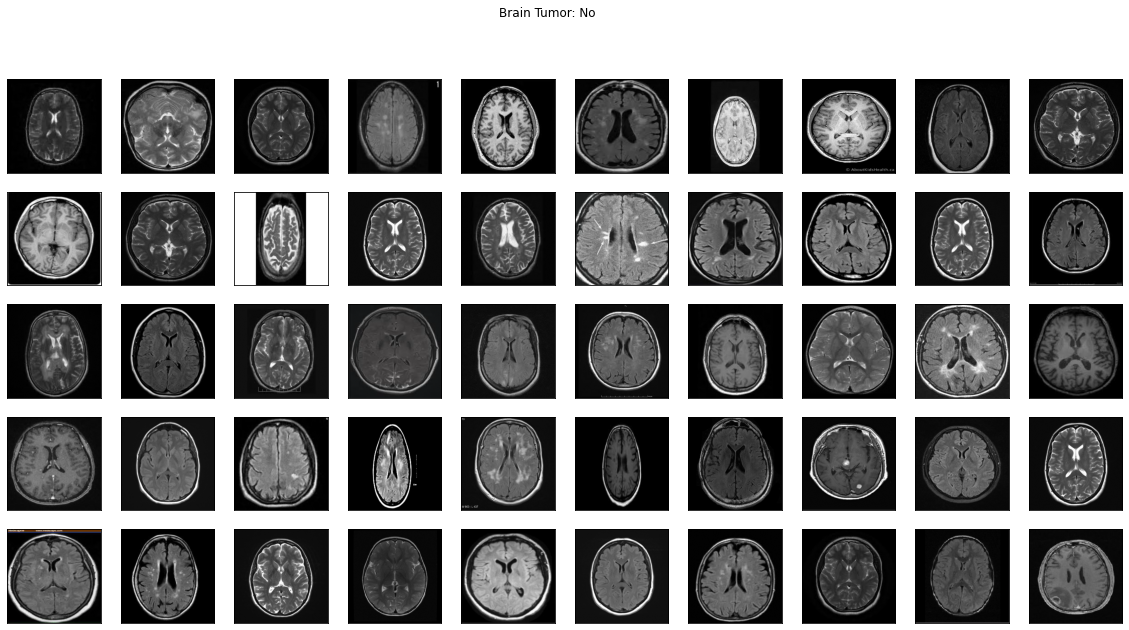

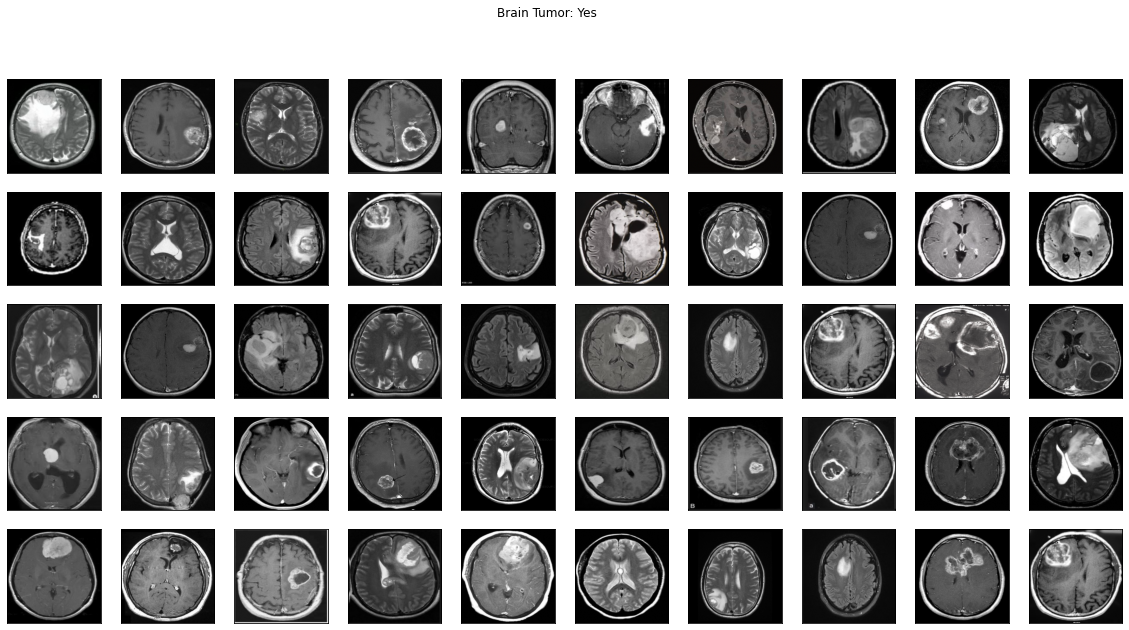

In [15]:
plot_sample_images(X, y)

## Training and Validation split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [17]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))

print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))

print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 202
number of test examples = 51
x_train shape: (202, 240, 240, 3)
y_train shape: (202, 1)
x_test shape: (51, 240, 240, 3)
y_test shape: (51, 1)


## Build the Model

In [18]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 240, 240, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 16)        0

## Train the Model

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x_train,y_train,epochs=25,verbose=1,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/25
7/7 [==============================] - 253s 27s/step - loss: 5.6334 - accuracy: 0.7228 - val_loss: 2.1339 - val_accuracy: 0.6471
Epoch 2/25
7/7 [==============================] - 124s 17s/step - loss: 2.2224 - accuracy: 0.7673 - val_loss: 1.1259 - val_accuracy: 0.7255
Epoch 3/25
7/7 [==============================] - 95s 14s/step - loss: 0.7660 - accuracy: 0.9010 - val_loss: 1.2652 - val_accuracy: 0.7059
Epoch 4/25
7/7 [==============================] - 108s 15s/step - loss: 0.6697 - accuracy: 0.8911 - val_loss: 1.8551 - val_accuracy: 0.6275
Epoch 5/25
7/7 [==============================] - 101s 14s/step - loss: 0.3351 - accuracy: 0.9257 - val_loss: 1.4861 - val_accuracy: 0.6667
Epoch 6/25
7/7 [==============================] - 92s 13s/step - loss: 0.2683 - accuracy: 0.9307 - val_loss: 0.9835 - val_accuracy: 0.7059
Epoch 7/25
7/7 [==============================] - 115s 16s/step - loss: 0.2104 - accuracy: 0.9455 - val_loss: 1.0044 - val_accuracy: 0.7059
Epoch 8/25
7/7 [======

## Plotting

In [22]:
def plot_learningCurve(history,epoch):
    epochrange=range(1,epoch+1)
    plt.plot(epochrange,history.history['accuracy'])
    plt.plot(epochrange,history.history['val_accuracy'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend(["train","test"],loc="upper left")
    plt.show()

    plt.plot(epochrange,history.history['loss'])
    plt.plot(epochrange,history.history['val_loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Loss Curve")
    plt.legend(["train","test"],loc="upper left")
    plt.show()

## Accuracy and Loss Curve

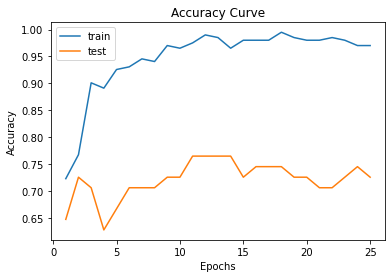

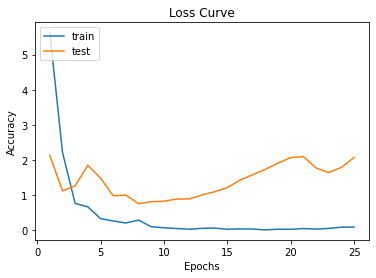

In [23]:
plot_learningCurve(history,25)

#### Accuracy

In [25]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7254902124404907


#### Confusion Matrix

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
y_pred=model.predict_classes(x_test)
print(confusion_matrix(y_test,y_pred))

C:\Users\NDS Ling Soft\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[16  4]
 [10 21]]


#### Classification Report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.84      0.68      0.75        31

    accuracy                           0.73        51
   macro avg       0.73      0.74      0.72        51
weighted avg       0.75      0.73      0.73        51



In [29]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation

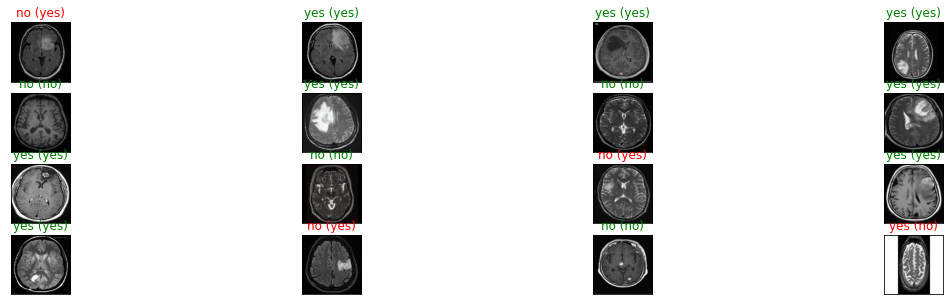

In [42]:
y_pred=model.predict_classes(x_test)
figure = plt.figure(figsize=(20, 5))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_pred[index]
    true_index = (y_test[index])
    ax.set_title("{} ({})".format("yes" if predict_index==1 else "no", 
                                  "yes" if true_index==1 else "no"),
                                  color=("green" if predict_index == true_index else "red"))